In [1]:
import torch
from fastai.vision.all import *
import re

In [2]:
import os,sys,inspect
sys.path.insert(0, '..') 

In [3]:
from lib.modules.matcher import HungarianMatcher
from lib.modules.parallel import *
from lib.modules.sequential import *
from lib.modules.single_classifier import SingleClassifier
from lib.modules.matcher import HungarianMatcher
from lib.modules.parallel import *
from lib.modules.sequential import *
from lib.modules.single_classifier import SingleClassifier
from lib.label import *
from lib.label import *
from lib.metric import *
from lib.data import *
from lib.loss import *
from lib.loader import *

In [8]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated7', 'smartphone'], path = '../data')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-all-5-best-2')

/home/kevin/miniconda3/lib/python3.8/site-packages/fastai/learner.py:55: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


SuggestedLRs(lr_min=6.918309954926372e-05, lr_steep=6.309573450380412e-07)

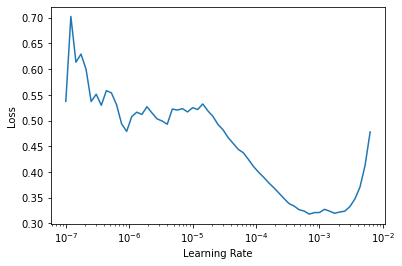

In [5]:
learn.lr_find()

In [6]:
learn.fit_one_cycle(2, 1e-4, cbs=SaveModelCallback(fname='480-sequential-all-5-best-3'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.053808,0.036367,0.994962,0.991736,48:00
1,0.024561,0.009599,0.998294,0.997245,48:13


Better model found at epoch 0 with valid_loss value: 0.03636739403009415.
Better model found at epoch 1 with valid_loss value: 0.00959911197423935.


SuggestedLRs(lr_min=4.365158383734525e-06, lr_steep=9.12010818865383e-07)

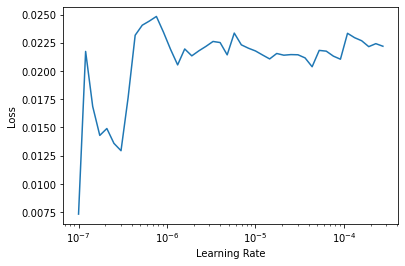

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(10, 1e-4, cbs=SaveModelCallback(fname='480-sequential-all-5-best-4'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.033305,0.019507,0.997441,0.995868,48:25
1,0.052177,0.034955,0.995745,0.993113,48:23
2,0.074583,0.165942,0.966253,0.944904,48:26
3,0.060055,0.099660,0.984866,0.975207,48:27
4,0.047663,0.059210,0.993266,0.988981,48:27
5,0.043256,0.039954,0.994119,0.990358,48:31
6,0.025362,0.014303,0.999147,0.998623,48:27
7,0.021648,0.027975,0.995745,0.993113,48:29
8,0.013076,0.009666,0.998294,0.997245,48:33
9,0.010764,0.013329,0.998294,0.997245,48:36


Better model found at epoch 0 with valid_loss value: 0.019507087767124176.
Better model found at epoch 6 with valid_loss value: 0.014303009957075119.
Better model found at epoch 8 with valid_loss value: 0.009665511548519135.


In [18]:
data = load_data(64, (480, 640), 'train', 'valid-july', max_rotate=10.0, exclude=['generated7', 'smartphone'], path = '../data')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-all-5-best-2')
preds = learn.get_preds()
my_accuracy3(*preds)

TensorMultiCategory(0.9504)

In [19]:
learn.load('480-sequential-2')
preds = learn.get_preds()
my_accuracy3(*preds)

TensorMultiCategory(0.9295)

In [21]:
learn.load('480-sequential-all-5-best-3')
preds = learn.get_preds()
my_accuracy3(*preds)

TensorMultiCategory(0.9806)

In [22]:
learn.load('480-sequential-all-5-best-4')
preds = learn.get_preds()
my_accuracy3(*preds)

TensorMultiCategory(0.9899)

In [24]:
torch.save(learn.model.state_dict(), '480-sequential-all-5.pkl')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.3182567499825382e-06)

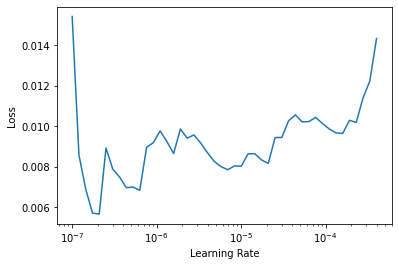

In [25]:
learn.lr_find()

SuggestedLRs(lr_min=6.30957365501672e-06, lr_steep=6.309573450380412e-07)

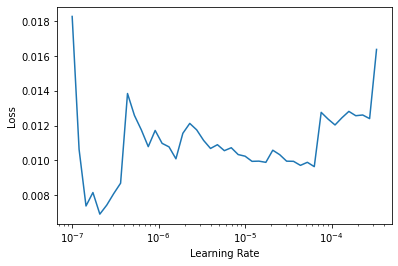

In [26]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=10.0, exclude=['generated7', 'smartphone'], path = '../data')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-all-5-best-4')
learn.lr_find()

In [27]:
learn.fit_one_cycle(6, 6.30957365501672e-06, cbs=SaveModelCallback(fname='480-sequential-all-5-best-5'))

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.011589,0.010785,0.998294,0.997245,48:07
1,0.010900,0.006491,0.999147,0.998623,48:19
2,0.008688,0.013376,0.997441,0.995868,48:26
3,0.009205,0.006560,0.999147,0.998623,48:32
4,0.007807,0.008246,0.999147,0.998623,48:32
5,0.007064,0.007811,0.998294,0.997245,48:32


Better model found at epoch 0 with valid_loss value: 0.010785267688333988.
Better model found at epoch 1 with valid_loss value: 0.006490766070783138.


In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=180.0, exclude=[], path = '../data')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-all-5-best-5')

/home/kevin/miniconda3/lib/python3.8/site-packages/fastai/learner.py:55: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=0.0003981071640737355)

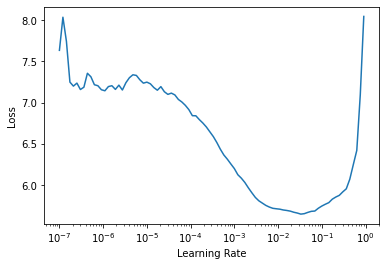

In [3]:
learn.lr_find()

In [4]:
learn.fit_one_cycle(4, 10e-3)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,3.010972,4.404775,0.123170,0.006887,1:29:07
1,2.666527,2.975411,0.454334,0.247934,1:28:49
2,1.779208,3.168107,0.375535,0.161157,1:28:39
3,0.708879,0.492113,0.906207,0.847108,1:28:46


SuggestedLRs(lr_min=9.12010818865383e-08, lr_steep=1.0964781722577754e-06)

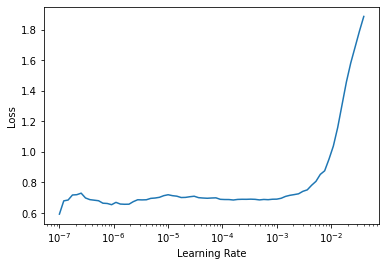

In [5]:
learn.lr_find()

In [6]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.671738,0.434152,0.916359,0.863636,1:28:35


In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=180.0, exclude=[], path = '../data')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-180-2-best-2')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=1.0964781722577754e-06)

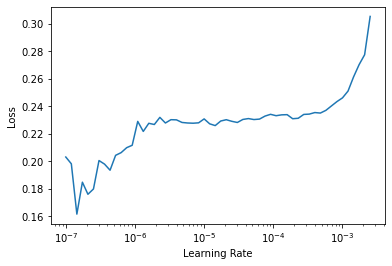

In [3]:
learn.lr_find()

In [4]:
learn.fit_one_cycle(3, 10e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.304503,0.138808,0.972983,0.955923,1:29:24
1,0.232194,0.150025,0.964781,0.946281,1:29:55
2,0.193815,0.070218,0.989912,0.983471,1:30:09


In [5]:
learn.save('480-sequential-180-all-2')

Path('models/480-sequential-180-all-2.pth')

SuggestedLRs(lr_min=3.981071586167673e-07, lr_steep=9.12010818865383e-07)

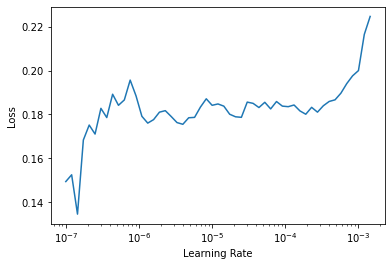

In [6]:
learn.lr_find()

In [7]:
learn.fit_one_cycle(1, 10e-5)

epoch,train_loss,valid_loss,my_accuracy2,my_accuracy3,time
0,0.197576,0.077770,0.986558,0.977961,1:29:46


In [3]:
learn.load('480-sequential-180-all-2')

In [4]:
learn.fit_one_cycle(10, 1e-4, cbs=SaveModelCallback(fname='480-sequential-180-all-2-best'))

Better model found at epoch 0 with valid_loss value: 0.10796190798282623.


IndexError: list index out of range

In [2]:
data = load_data(64, (480, 640), 'train', 'valid', max_rotate=180.0, exclude=[], path = '../data')
model = MultiDartPlus(resnet18)
learn = Learner(data, model, metrics=[my_accuracy2, my_accuracy3], splitter=splitter2, loss_func=MyLoss(), wd=0.5).to_fp16()
learn.load('480-sequential-180-2-best-2')
torch.save(learn.model.state_dict(), './480-sequential-180-2-best-2.pkl')

/home/kevin/miniconda3/lib/python3.8/site-packages/fastai/learner.py:55: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")
